In [1]:
import numpy as np 
import scipy as sc 
import statistics as st 
import seaborn as sns 
import matplotlib.pyplot as plt 

<Axes: ylabel='Density'>

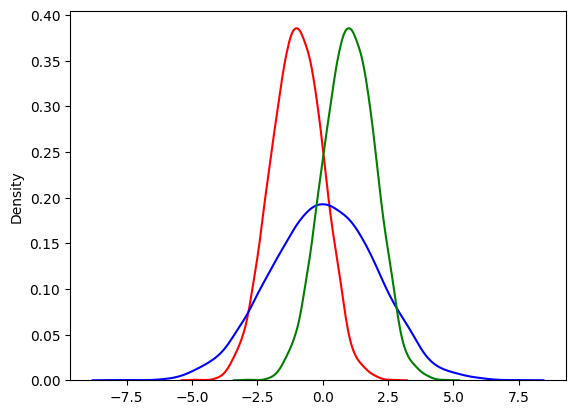

In [2]:
N = 10001

x = np.random.randn(N)
d1 = x-1
d2 = 2*x
d3 = x+1

sns.kdeplot(d1 , color='red')
sns.kdeplot(d2 , color='blue')
sns.kdeplot(d3 , color='green')

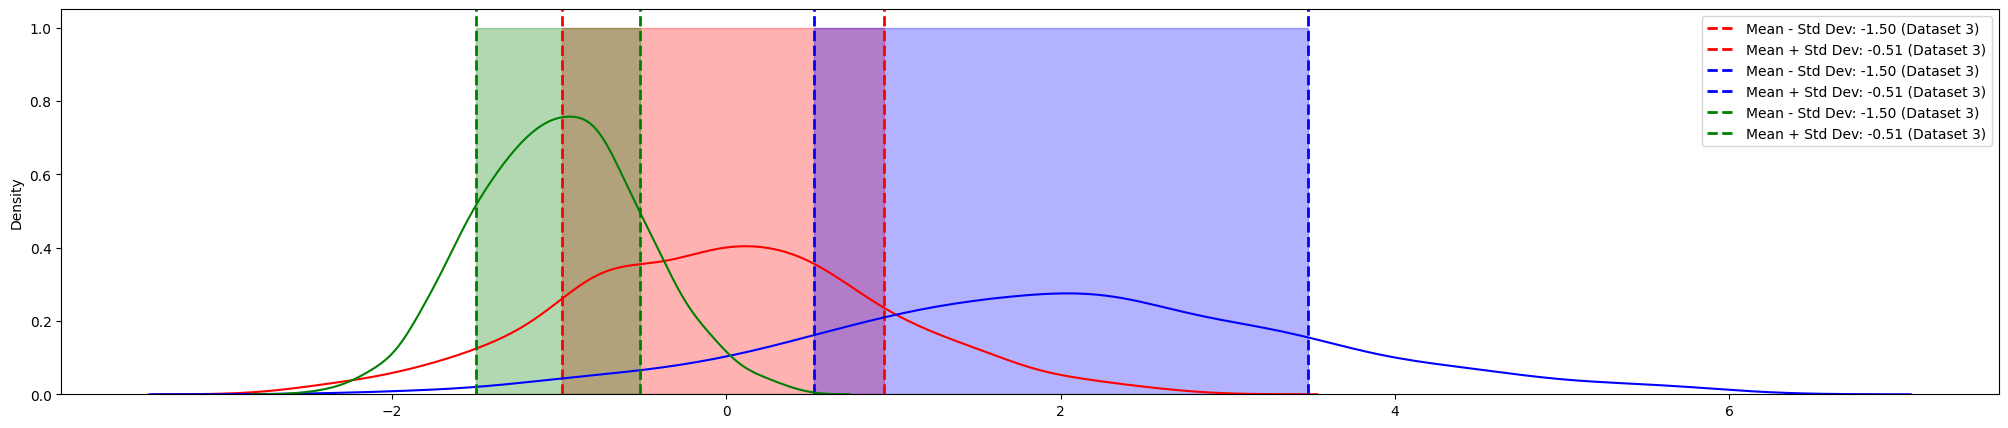

In [37]:
# Calculate mean and standard deviation for each dataset
mean = np.zeros(3)
stds = np.zeros(3)
for i, data in enumerate([d1, d2, d3]):
    mean[i] = np.mean(data)
    stds[i] = np.std(data, ddof=1)

plt.figure(figsize=(25,5))

sns.kdeplot(d1, color='red')
plt.axvline(mean[0] - stds[0], color='r', linestyle='--', linewidth=2, label=f'Mean - Std Dev: {mean[i] - stds[i]:.2f} (Dataset {i+1})')
plt.axvline(mean[0] + stds[0], color='r', linestyle='--', linewidth=2, label=f'Mean + Std Dev: {mean[i] + stds[i]:.2f} (Dataset {i+1})')
plt.fill_betweenx([0, 1], mean[0] - stds[0], mean[0] + stds[0], color='r', alpha=0.3)

sns.kdeplot(d2, color='blue')
plt.axvline(mean[1] - stds[1], color='b', linestyle='--', linewidth=2, label=f'Mean - Std Dev: {mean[i] - stds[i]:.2f} (Dataset {i+1})')
plt.axvline(mean[1] + stds[1], color='b', linestyle='--', linewidth=2, label=f'Mean + Std Dev: {mean[i] + stds[i]:.2f} (Dataset {i+1})')
plt.fill_betweenx([0, 1], mean[1] - stds[1], mean[1] + stds[1], color='b', alpha=0.3)

sns.kdeplot(d3, color='green')
plt.axvline(mean[2] - stds[2], color='g', linestyle='--', linewidth=2, label=f'Mean - Std Dev: {mean[i] - stds[i]:.2f} (Dataset {i+1})')
plt.axvline(mean[2] + stds[2], color='g', linestyle='--', linewidth=2, label=f'Mean + Std Dev: {mean[i] + stds[i]:.2f} (Dataset {i+1})')
plt.fill_betweenx([0, 1], mean[2] - stds[2], mean[2] + stds[2], color='g', alpha=0.3)
# Add legend
plt.legend()



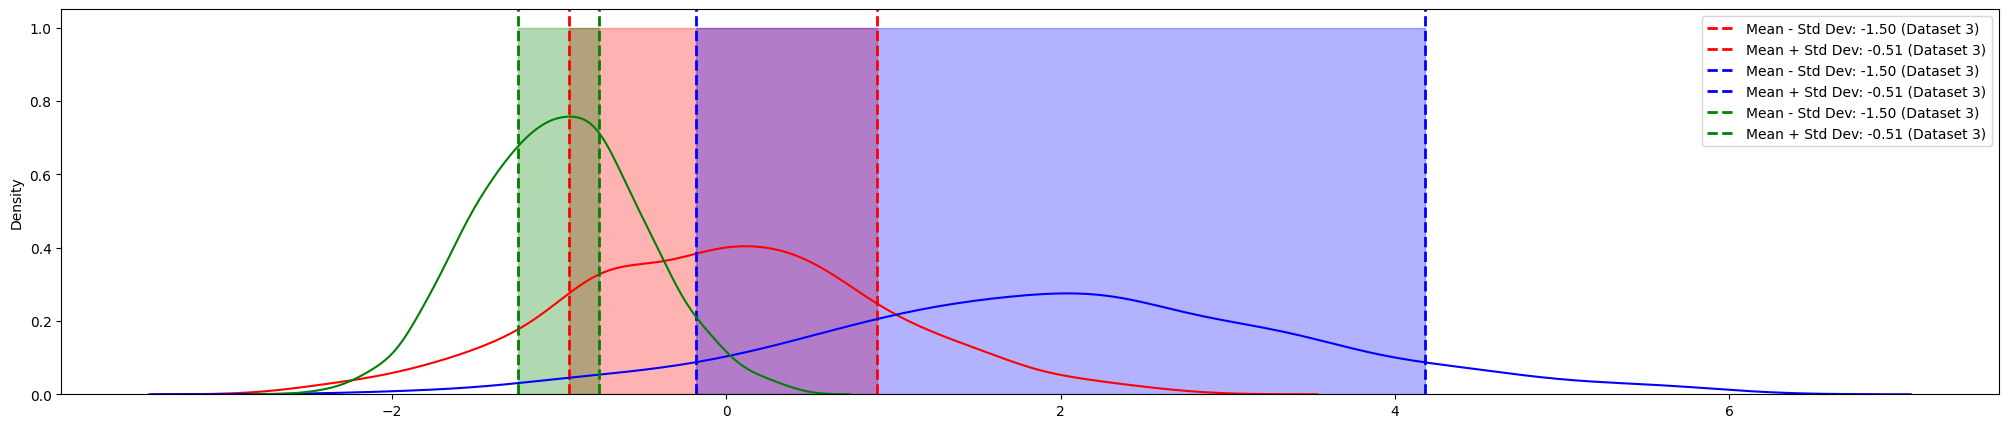

In [36]:
mean = np.zeros(3)
var = np.zeros(3)
for i, data in enumerate([d1, d2, d3]):
    mean[i] = np.mean(data)
    var[i] = np.var(data)

plt.figure(figsize=(25,5))

sns.kdeplot(d1, color='red')
plt.axvline(mean[0] - var[0], color='r', linestyle='--', linewidth=2, label=f'Mean - Std Dev: {mean[i] - stds[i]:.2f} (Dataset {i+1})')
plt.axvline(mean[0] + var[0], color='r', linestyle='--', linewidth=2, label=f'Mean + Std Dev: {mean[i] + stds[i]:.2f} (Dataset {i+1})')
plt.fill_betweenx([0, 1], mean[0] - var[0], mean[0] + var[0], color='r', alpha=0.3)

sns.kdeplot(d2, color='blue')
plt.axvline(mean[1] - var[1], color='b', linestyle='--', linewidth=2, label=f'Mean - Std Dev: {mean[i] - stds[i]:.2f} (Dataset {i+1})')
plt.axvline(mean[1] + var[1], color='b', linestyle='--', linewidth=2, label=f'Mean + Std Dev: {mean[i] + stds[i]:.2f} (Dataset {i+1})')
plt.fill_betweenx([0, 1], mean[1] - var[1], mean[1] + var[1], color='b', alpha=0.3)

sns.kdeplot(d3, color='green')
plt.axvline(mean[2] - var[2], color='g', linestyle='--', linewidth=2, label=f'Mean - Std Dev: {mean[i] - stds[i]:.2f} (Dataset {i+1})')
plt.axvline(mean[2] + var[2], color='g', linestyle='--', linewidth=2, label=f'Mean + Std Dev: {mean[i] + stds[i]:.2f} (Dataset {i+1})')
plt.fill_betweenx([0, 1], mean[2] - var[2], mean[2] + var[2], color='g', alpha=0.3)
# Add legend
plt.legend()

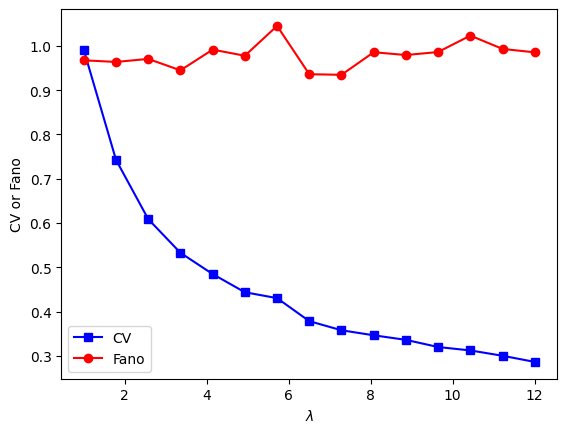

In [38]:
## compute fano factor and CV for a range of lambda parameters

# list of parameters
lambdas = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    # generate new data
    data = np.random.poisson(lambdas[li],1000)
    
    # compute the metrics
    cv[li]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)


# and plot
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()